# ⚽ Do Women’s World Cup Matches Have More Goals Than Men’s?

Every FIFA World Cup delivers unforgettable moments — last-minute winners, underdog triumphs, and of course… goals.  
But here’s a question: **do women’s matches tend to be higher scoring than men’s?**

In this notebook, we’ll investigate using official FIFA World Cup match results (excluding qualifiers) since **2002-01-01**.  

We’ll test the following hypotheses at a **10% significance level (α = 0.10):**

- **Null hypothesis (H₀):** The mean number of goals scored in women’s World Cup matches is the same as in men’s.  
- **Alternative hypothesis (H₁):** The mean number of goals scored in women’s World Cup matches is greater than in men’s.  

To answer this, we’ll:  
1. Load and filter historical FIFA match results  
2. Explore and visualise goal distributions  
3. Choose an appropriate hypothesis test  
4. Statistically test whether women’s World Cup matches feature more goals  

Let’s kick off! 

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg

## 1. Load the datasets

We begin by loading match results data for women’s and men’s international football.

In [12]:
# Load match results
women_results = pd.read_csv("women_results.csv")
men_results   = pd.read_csv("men_results.csv")

# Preview data
print("Women’s results sample:")
display(women_results.head())

print("Men’s results sample:")
display(men_results.head())

print(f"Number of matches: Women = {len(women_results)}, Men = {len(men_results)}")

Women’s results sample:


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


Men’s results sample:


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


Number of matches: Women = 4884, Men = 44353


## 2. Explore tournaments in the women's dataset

In [13]:
# Check unique tournaments in women's data
women_results["tournament"].unique()

array(['Euro', 'AFC Championship', 'UEFA Euro qualification',
       'OFC Championship', 'UEFA Euro', 'African Championship',
       'CONCACAF Championship', 'Copa América', 'FIFA World Cup',
       'CONCACAF Invitational Tournament', 'Algarve Cup', 'Olympic Games',
       'Four Nations Tournament', 'African Championship qualification',
       'CONCACAF Gold Cup qualification', 'CONCACAF Gold Cup',
       'AFC Asian Cup qualification', 'AFC Asian Cup', 'Cyprus Cup',
       'Olympic Games qualification', 'Friendly', 'SheBelieves Cup',
       'FIFA World Cup qualification', 'Tournament of Nations',
       'OFC Nations Cup qualification', 'African Cup of Nations',
       'OFC Nations Cup', 'Tournoi de France',
       "Basque Country Women's Cup",
       'African Cup of Nations qualification'], dtype=object)

## 3. Filter FIFA World Cup matches since 2002

We filter both datasets to include only FIFA World Cup matches played **after January 1st, 2002**.

In [14]:
women_fifawc_2002 = women_results[
    (women_results["tournament"] == "FIFA World Cup") &
    (women_results["date"] >= "2002-01-01")
]

men_fifawc_2002 = men_results[
    (men_results["tournament"] == "FIFA World Cup") &
    (men_results["date"] >= "2002-01-01")
]

print(f"Filtered Women’s WC matches: {len(women_fifawc_2002)}")
print(f"Filtered Men’s WC matches: {len(men_fifawc_2002)}")

display(women_fifawc_2002.head())
display(men_fifawc_2002.head())

Filtered Women’s WC matches: 200
Filtered Men’s WC matches: 384


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


## 4. Calculate goals per match

We calculate the total number of goals scored in each match (home + away).

In [15]:
women_total_goals = women_fifawc_2002["home_score"] + women_fifawc_2002["away_score"]
men_total_goals   = men_fifawc_2002["home_score"] + men_fifawc_2002["away_score"]

## 5. Explore the distributions

Before choosing a statistical test, it’s important to check whether the data looks normally distributed.  
If both groups followed a normal distribution, we could use a parametric test (e.g., t-test).  
If not, a non-parametric test (e.g., Mann–Whitney U) would be more appropriate.

Here, we plot the distributions of **goals per match** in men’s and women’s FIFA World Cups (2002–present).  
From the plots, we can visually assess whether the distributions appear normal or skewed.


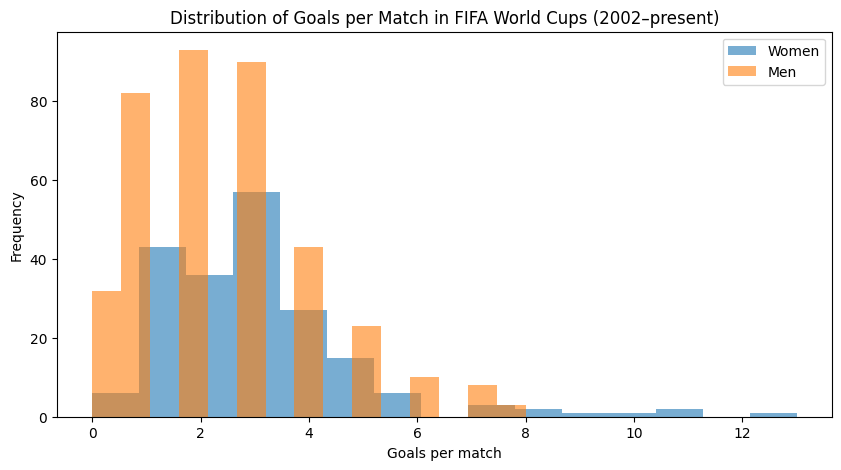

In [16]:
plt.figure(figsize=(10, 5))

# Plot histograms for both groups
plt.hist(women_total_goals, bins=15, alpha=0.6, label="Women")
plt.hist(men_total_goals, bins=15, alpha=0.6, label="Men")

plt.xlabel("Goals per match")
plt.ylabel("Frequency")
plt.title("Distribution of Goals per Match in FIFA World Cups (2002–present)")
plt.legend()
plt.show()


## 6. Statistical test: Mann–Whitney U test

We use the **Mann–Whitney U test** to check whether women’s World Cup matches tend to have more goals per match than men’s World Cup matches.  
- **Null hypothesis (H0):** The distributions of goals per match are the same.  
- **Alternative hypothesis (H1):** Women’s matches have more goals than men’s.  

In [22]:
# Mann–Whitney U test (alternative = "greater")
test = pg.mwu(x=women_total_goals, y=men_total_goals, alternative="greater")

print("Mann–Whitney U test results:")
display(test)

# Interpret results
p_val = float(test["p-val"].iloc[0])
result_dict = {
    "p_val": p_val,
    "result": "reject" if p_val < 0.05 else "fail to reject"
}

print("\nTest summary:")
print(result_dict)

Mann–Whitney U test results:


,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,0.126901,0.563451



Test summary:
{'p_val': 0.005106609825443641, 'result': 'reject'}


## Conclusion

We set out to test whether women’s FIFA World Cup matches since 2002 have, on average, more goals than men’s matches.  

From the distribution plots, the data did not appear normally distributed, so instead of a t-test we used a **Mann–Whitney U test**, a non-parametric alternative.  

- **Significance level (α):** 0.10  
- **p-value:** 0.005  

### Interpretation:
Since the p-value (0.005) is **well below** our significance threshold of 0.10, we **reject the null hypothesis**.  

This provides strong statistical evidence that **women’s FIFA World Cup matches feature more goals per match than men’s**. ⚽🔥
